In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob
import math
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import Image

import tensorflow as tf
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import keras

#cv
import cv2
import math
from PIL import Image
import math
from scipy import ndimage
import argparse
import imutils
import xml.etree.ElementTree as ET

import random 
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="consolas")
plt.rcParams["font.family"]="consolas" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="consolas", 
        rc={"axes.unicode_minus":False},style='darkgrid')

%cd C:\Users\yukir\Documents\Monicas_workspace\Knee

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1438970013380191668
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8170518672295956202
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 362545552485325728
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7039993270071176823
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
keras 2.3.0-tf
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Knee


In [2]:
# process시각화 및 손실함수

def plot_it(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(20,10))
    ax.plot(history.history['mae_in_months'])
    ax.plot(history.history['val_mae_in_months'])
    plt.title('Model Error')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()
    fig = plt.gcf()
    fig.savefig("../03_model_visualization/"+model_name+".jpg")
    plt.close(fig)

### DATA

In [3]:
train_dir = "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\data\\archive\\train"
test_dir =  "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\data\\archive\\test"
val_dir =  "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\data\\archive\\val"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
from keras import Input
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224,224), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=16, target_size=(224, 224), color_mode='rgb')

input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


In [6]:
from tqdm import tqdm

In [7]:
train_images =[]
train_labels = []

for directory_path in tqdm (glob.glob(train_dir+'\\'+'*')):
    path_directory = directory_path
    # print(directory_path)
    label = directory_path.split('\\')[-1]
    # print(label)
    for img_path in os.listdir(os.path.join(path_directory+'\\')):
        img_path = path_directory+'\\'+img_path

        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        # img = cv2.resize(img, (244, 224))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(len(train_images))
print(len(train_labels))

100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


5778
5778


In [8]:
# Capture test/validation data and labels into respective lists

SIZE = 224  #Resize images

#Capture training data and labels into respective lists
test_images = []
test_labels = [] 


for directory_path in tqdm (glob.glob(val_dir+'\\'+'*')):
    path_directory = directory_path
    # print(directory_path)
    label = directory_path.split('\\')[-1]
    # print(label)
    for img_path in os.listdir(os.path.join(path_directory+'\\')):
        img_path = path_directory+'\\'+img_path

        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        # img = cv2.resize(img, (244, 224))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays        
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(len(test_images))
print(len(test_labels))

100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

826
826


In [9]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
#딥러닝으로 들어갈때는 원핫으로 들어가야함

from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [14]:
from tensorflow.keras.applications import Xception

In [15]:
#Load model wothout classifier/fully connected layers
SIZE = 224
model = tf.keras.applications.xception.Xception(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=5,
    classifier_activation='softmax'
)

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
    
model.summary()  #Trainable parameters will be 0

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [16]:
#Now, let us use features from convolutional network for RF
feature_extractor=model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train = features #This is our X input to RF

In [17]:
# #RANDOM FOREST
# from sklearn.ensemble import RandomForestClassifier
# RF_model = RandomForestClassifier(n_estimators = 100, n_jobs = 1, random_state = 1337)

# # Train the model on training data
# RF_model.fit(X_train, y_train) #For sklearn no one hot encoding

# #Send test data through same feature extractor process
# X_test_feature = model.predict(x_test)
# X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# #Now predict using the trained RF model. 
# prediction_RF = RF_model.predict(X_test_features)
# # print(prediction_RF)
# #Inverse le transform to get original label back. 
# prediction_RF = le.inverse_transform(prediction_RF)
# # print(prediction_RF)

In [18]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

#Send test data through same feature extractor process
X_test_feature = model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = clf.predict(X_test_features)
# print(prediction_RF)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)
# print(prediction_RF)

In [22]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.49515738498789347


              precision    recall  f1-score   support

           0       0.54      0.80      0.65       328
           1       0.22      0.04      0.07       153
           2       0.43      0.49      0.46       212
           3       0.49      0.34      0.40       106
           4       0.33      0.04      0.07        27

    accuracy                           0.50       826
   macro avg       0.40      0.34      0.33       826
weighted avg       0.44      0.50      0.44       826



<AxesSubplot:>

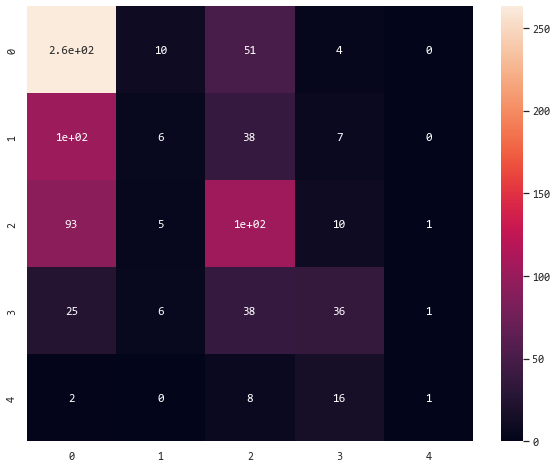

In [23]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
report = classification_report(test_labels, prediction_RF)
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
print(report)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['2']
The actual label for this image is:  1


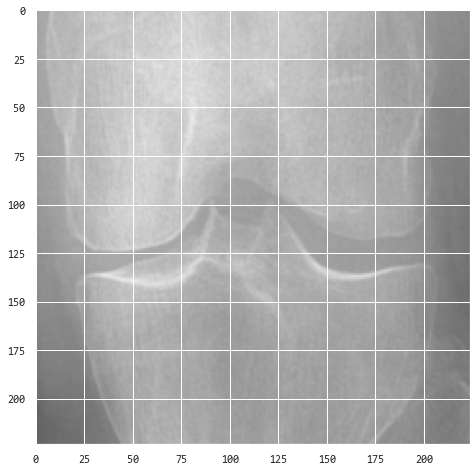

In [27]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = clf.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])